In [ ]:
#Here are the imports we'll need for this project
from google.colab import drive
import time
import pandas as pd
import math
import seaborn as sns
from sklearn import preprocessing
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB

In [ ]:
#These next two cells will load the data from my Google Cloud drive.
#If you want to mirror this process, you can rewrite these steps to
#instead grab the data from somewhere else(ex: local drive)
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#Load in the data
start = time.time()
print("Loading the data")
loc = "/content/drive/MyDrive/icr/data.csv"
df = pd.read_csv(loc)
end = time.time()
print("Time to read data.csv:")
print(str(round((end - start),2)) + " seconds")

Loading the data
Time to read data.csv:
0.48 seconds


In [ ]:
#Now that's evertything loaded in, let's get a snapshot of the data
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
df.head()

,Id,AB,AF,AH,AM,AR,AX,AY,AZ,BC,BD,BN,BP,BQ,BR,BZ,CB,CC,CD,CF,CH,CL,CR,CS,CU,CW,DA,DE,DF,DH,DI,DL,DN,DU,DV,DY,EB,EE,EG,EH,EJ,EL,EP,EU,FC,FD,FE,FI,FL,FR,FS,GB,GE,GF,GH,GI,GL,Class
0,000ff2bfdfe9,0.209377,3109.03329,85.200147,22.394407,8.138688,0.699861,0.025578,9.812214,5.555634,4126.58731,22.5984,175.638726,152.707705,823.928241,257.432377,47.223358,0.563481,23.387600,4.851915,0.023482,1.050225,0.069225,13.784111,1.302012,36.205956,69.08340,295.570575,0.23868,0.284232,89.245560,84.31664,29.657104,5.310690,1.74307,23.187704,7.294176,1.987283,1433.166750,0.949104,B,30.879420,78.526968,3.828384,13.394640,10.265073,9028.291921,3.583450,7.298162,1.73855,0.094822,11.339138,72.611063,2003.810319,22.136229,69.834944,0.120343,1
1,007255e47698,0.145282,978.76416,85.200147,36.968889,8.138688,3.632190,0.025578,13.517790,1.229900,5496.92824,19.4205,155.868030,14.754720,51.216883,257.432377,30.284345,0.484710,50.628208,6.085041,0.031442,1.113875,1.117800,28.310953,1.357182,37.476568,70.79836,178.553100,0.23868,0.363489,110.581815,75.74548,37.532000,0.005518,1.74307,17.222328,4.926396,0.858603,1111.287150,0.003042,A,109.125159,95.415086,52.260480,17.175984,0.296850,6785.003474,10.358927,0.173229,0.49706,0.568932,9.292698,72.611063,27981.562750,29.135430,32.131996,21.978000,0
2,013f2bd269f5,0.470030,2635.10654,85.200147,32.360553,8.138688,6.732840,0.025578,12.824570,1.229900,5135.78024,26.4825,128.988531,219.320160,482.141594,257.432377,32.563713,0.495852,85.955376,5.376488,0.036218,1.050225,0.700350,39.364743,1.009611,21.459644,70.81970,321.426625,0.23868,0.210441,120.056438,65.46984,28.053464,1.289739,1.74307,36.861352,7.813674,8.146651,1494.076488,0.377208,B,109.125159,78.526968,5.390628,224.207424,8.745201,8338.906181,11.626917,7.709560,0.97556,1.198821,37.077772,88.609437,13676.957810,28.022851,35.192676,0.196941,0
3,043ac50845d5,0.252107,3819.65177,120.201618,77.112203,8.138688,3.685344,0.025578,11.053708,1.229900,4169.67738,23.6577,237.282264,11.050410,661.518640,257.432377,15.201914,0.717882,88.159360,2.347652,0.029054,1.400300,0.636075,41.116960,0.722727,21.530392,47.27586,196.607985,0.23868,0.292431,139.824570,71.57120,24.354856,2.655345,1.74307,52.003884,7.386060,3.813326,15691.552180,0.614484,B,31.674357,78.526968,31.323372,59.301984,7.884336,10965.766040,14.852022,6.122162,0.49706,0.284466,18.529584,82.416803,2094.262452,39.948656,90.493248,0.155829,0
4,044fb8a146ec,0.380297,3733.04844,85.200147,14.103738,8.138688,3.942255,0.054810,3.396778,102.151980,5728.73412,24.0108,324.546318,149.717165,6074.859475,257.432377,82.213495,0.536467,72.644264,30.537722,0.025472,1.050225,0.693150,31.724726,0.827550,34.415360,74.06532,200.178160,0.23868,0.207708,97.920120,52.83888,26.019912,1.144902,1.74307,9.064856,7.350720,3.490846,1403.656300,0.164268,B,109.125159,91.994825,51.141336,29.102640,4.274640,16198.049590,13.666727,8.153058,48.50134,0.121914,16.408728,146.109943,8524.370502,45.381316,36.262628,0.096614,1


N.B. For this notebook I am using the Kaggle provided training dataset for both testing and training by splitting them. Unfortunately the test csv is filled with only 0's until I make a submission there, so for the purposes of demoing this data I just want to stick with what's provided


In [ ]:
#Now let's see what the distributions look like for these different values
df.describe()

,AB,AF,AH,AM,AR,AX,AY,AZ,BC,BD,BN,BP,BQ,BR,BZ,CB,CC,CD,CF,CH,CL,CR,CS,CU,CW,DA,DE,DF,DH,DI,DL,DN,DU,DV,DY,EB,EE,EG,EH,EL,EP,EU,FC,FD,FE,FI,FL,FR,FS,GB,GE,GF,GH,GI,GL,Class
count,617.000000,617.000000,617.000000,617.000000,617.000000,617.000000,617.000000,617.000000,617.000000,617.000000,617.000000,617.000000,557.000000,617.000000,617.000000,615.000000,614.000000,617.000000,617.000000,617.000000,617.000000,617.000000,617.000000,617.000000,617.000000,617.000000,617.000000,617.000000,617.000000,617.000000,617.000000,617.000000,616.000000,617.000000,617.000000,617.000000,617.000000,617.000000,617.000000,557.000000,617.000000,617.000000,616.000000,617.000000,617.000000,617.000000,616.000000,617.000000,615.000000,617.000000,617.000000,617.000000,617.000000,617.000000,616.000000,617.000000
mean,0.477149,3502.013221,118.624513,38.968552,10.128242,5.545576,0.060320,10.566447,8.053012,5350.388655,21.419492,231.322223,98.328737,1218.133238,550.632525,77.104151,0.688801,90.251735,11.241064,0.030615,1.403761,0.742262,36.917590,1.383792,27.165653,51.128326,401.901299,0.633884,0.367002,146.972099,94.795377,26.370568,1.802900,1.924830,26.388989,9.072700,3.064778,1731.248215,0.305107,69.582596,105.060712,69.117005,71.341526,6.930086,10306.810737,10.111079,5.433199,3.533905,0.421501,20.724856,131.714987,14679.595398,31.489716,50.584437,8.530961,0.175041
std,0.468388,2300.322717,127.838950,69.728226,10.518877,2.551696,0.416817,4.350645,65.166943,3021.326641,3.478278,183.992505,96.479371,7575.293707,2076.371275,159.049302,0.263994,51.585130,13.571133,0.014808,1.922210,0.281195,17.266347,0.538717,14.645993,21.210888,317.745623,1.912384,0.112989,86.084419,28.243187,8.038825,9.034721,1.484555,18.116679,6.200281,2.058344,1790.227476,1.847499,38.555707,68.445620,390.187057,165.551545,64.754262,11331.294051,2.934025,11.496257,50.181948,1.305365,9.991907,144.181524,19352.959387,9.864239,36.266251,10.327010,0.380310
min,0.081187,192.593280,85.200147,3.177522,8.138688,0.699861,0.025578,3.396778,1.229900,1693.624320,9.886800,72.948951,1.331155,51.216883,257.432377,12.499760,0.176874,23.387600,0.510888,0.003184,1.050225,0.069225,13.784111,0.137925,7.030640,6.906400,35.998895,0.238680,0.040995,60.232470,10.345600,6.339496,0.005518,1.743070,0.804068,4.926396,0.286201,185.594100,0.003042,5.394675,78.526968,3.828384,7.534128,0.296850,1563.136688,3.583450,0.173229,0.497060,0.067730,4.102182,72.611063,13.038894,9.432735,0.897628,0.001129,0.000000
25%,0.252107,2197.345480,85.200147,12.270314,8.138688,4.128294,0.025578,8.129580,1.229900,4155.702870,19.420500,156.847239,27.834425,424.990642,257.432377,23.317567,0.563688,64.724192,5.066306,0.023482,1.050225,0.589575,29.782467,1.070298,7.030640,37.942520,188.815690,0.238680,0.295164,102.703553,78.232240,20.888264,0.005518,1.743070,14.715792,5.965392,1.648679,1111.160625,0.003042,30.927468,78.526968,4.324656,25.815384,0.296850,5164.666260,8.523098,0.173229,0.497060,0.067730,14.036718,72.611063,2798.992584,25.034888,23.011684,0.124392,0.000000
50%,0.354659,3120.318960,85.200147,20.533110,8.138688,5.031912,0.025578,10.461320,1.229900,4997.960730,21.186000,193.908816,61.642115,627.417402,257.432377,42.554330,0.658715,79.819104,9.123000,0.027860,1.050225,0.730800,34.835130,1.351665,36.019104,49.180940,307.509595,0.238680,0.358023,130.050630,96.264960,25.248800,0.251741,1.743070,21.642456,8.149404,2.616119,1493.817413,0.085176,71.949306,78.526968,22.641144,36.394008,1.870155,7345.143424,9.945452,3.028141,1.131000,0.250601,18.771436,72.611063,7838.273610,30.608946,41.007968,0.337827,0.000000
75%,0.559763,4361.637390,113.739540,39.139886,8.138688,6.431634,0.036845,12.969516,5.081244,6035.885700,23.657700,247.803462,134.009015,975.649259,257.432377,77.310097,0.772206,99.813520,13.565901,0.034427,1.228445,0.859350,40.529401,1.660617,37.935832,61.408760,507.896200,0.238680,0.426348,165.836955,110.640680,30.544224,1.058690,1.743070,34.058344,10.503048,3.910070,1905.701475,0.237276,109.125159,112.766654,49.085352,56.714448,4.88021

<Axes: xlabel='Class', ylabel='Count'>

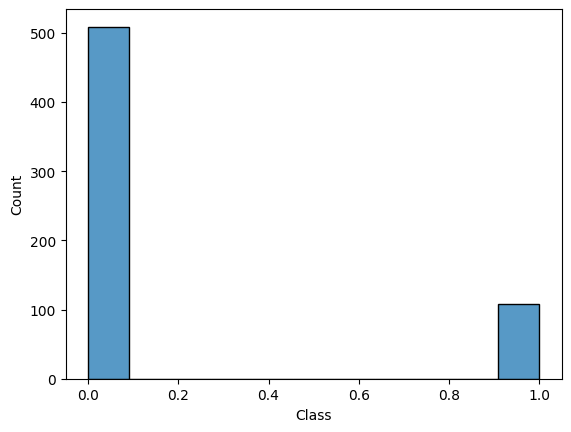

In [ ]:
#Let's look at a histogram for target class
sns.histplot(data=df, x="Class")

<Axes: xlabel='AB', ylabel='Count'>

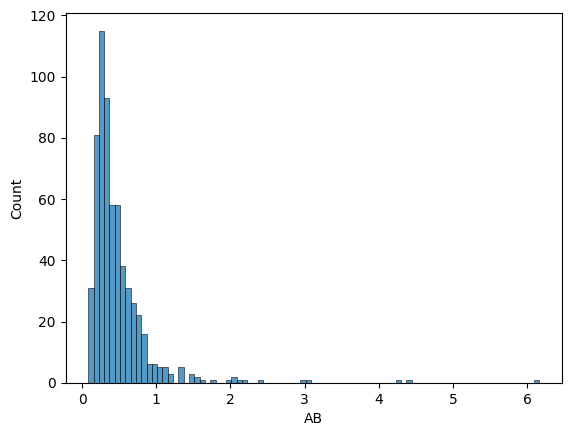

In [ ]:
#Looks like our trarget class if unbalanced. We could try over or under-sampling, but let's work with the other variables first
#Let's try plotting the distribution of some our independent variables to visualize after seeing the describe() report above
sns.histplot(data=df, x="AB")

<Axes: xlabel='BC', ylabel='Count'>

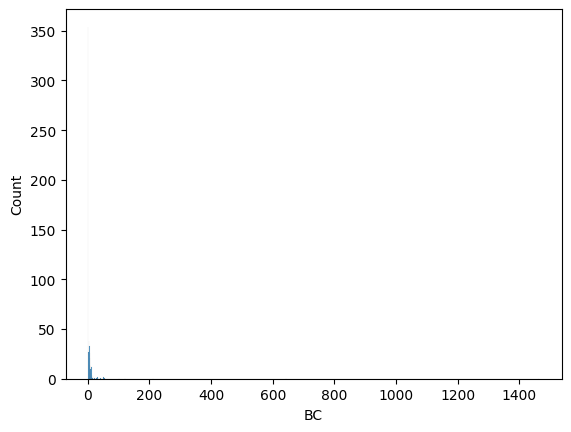

In [ ]:
sns.histplot(data=df, x="BC")

<Axes: xlabel='FI', ylabel='Count'>

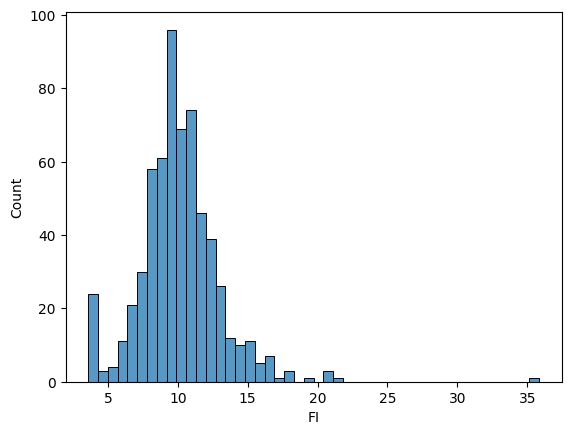

In [ ]:
sns.histplot(data=df, x="FI")

In [ ]:
# Seems to be a common theme of each column having a somewhat gaussian distribution, but some or several outliers
# If we want to use a distance based macine learning technique, we'll need to feature scale to handle these different columns
#First we need to fix the EJ column to be binary, not a string so it fits with the other cols

df["EJ_is_A"] = (df['EJ'] == "A").astype(int)
df = df.drop("EJ", axis =1)

In [ ]:
#Now let's take a look at how many NAs are in each column
nan_count = df.isna().sum()
print(nan_count)

Id          0
AB          0
AF          0
AH          0
AM          0
AR          0
AX          0
AY          0
AZ          0
BC          0
BD          0
BN          0
BP          0
BQ         60
BR          0
BZ          0
CB          2
CC          3
CD          0
CF          0
CH          0
CL          0
CR          0
CS          0
CU          0
CW          0
DA          0
DE          0
DF          0
DH          0
DI          0
DL          0
DN          0
DU          1
DV          0
DY          0
EB          0
EE          0
EG          0
EH          0
EL         60
EP          0
EU          0
FC          1
FD          0
FE          0
FI          0
FL          1
FR          0
FS          2
GB          0
GE          0
GF          0
GH          0
GI          0
GL          1
Class       0
EJ_is_A     0
dtype: int64


In [ ]:
#Looks like BQ and EL have 60 missing values
#While CB, CC, DU, FC, FL, FS, GL have 1-3 missing
#So let's drop BQ and EL and see how many rows we're missing if we drop the rows where the other columns are missing
df = df.drop(["BQ", "EL"], axis=1)
print(df.shape)

(617, 56)


In [ ]:
dropped_df = df.dropna()
print(dropped_df.shape)
#Dropping all the nas only removed 5/716 rows which is not much, so we'll stick with this approach vs data imputation and move on

(612, 56)


In [ ]:
#Now let's try scaling the data using the standard scalar
target_df = dropped_df.drop(["Id"], axis=1)
cols = target_df.columns
standard_scaler = preprocessing.StandardScaler()
scaled = standard_scaler.fit_transform(target_df)
scaled_df = pd.DataFrame(scaled, columns = cols)

<Axes: >

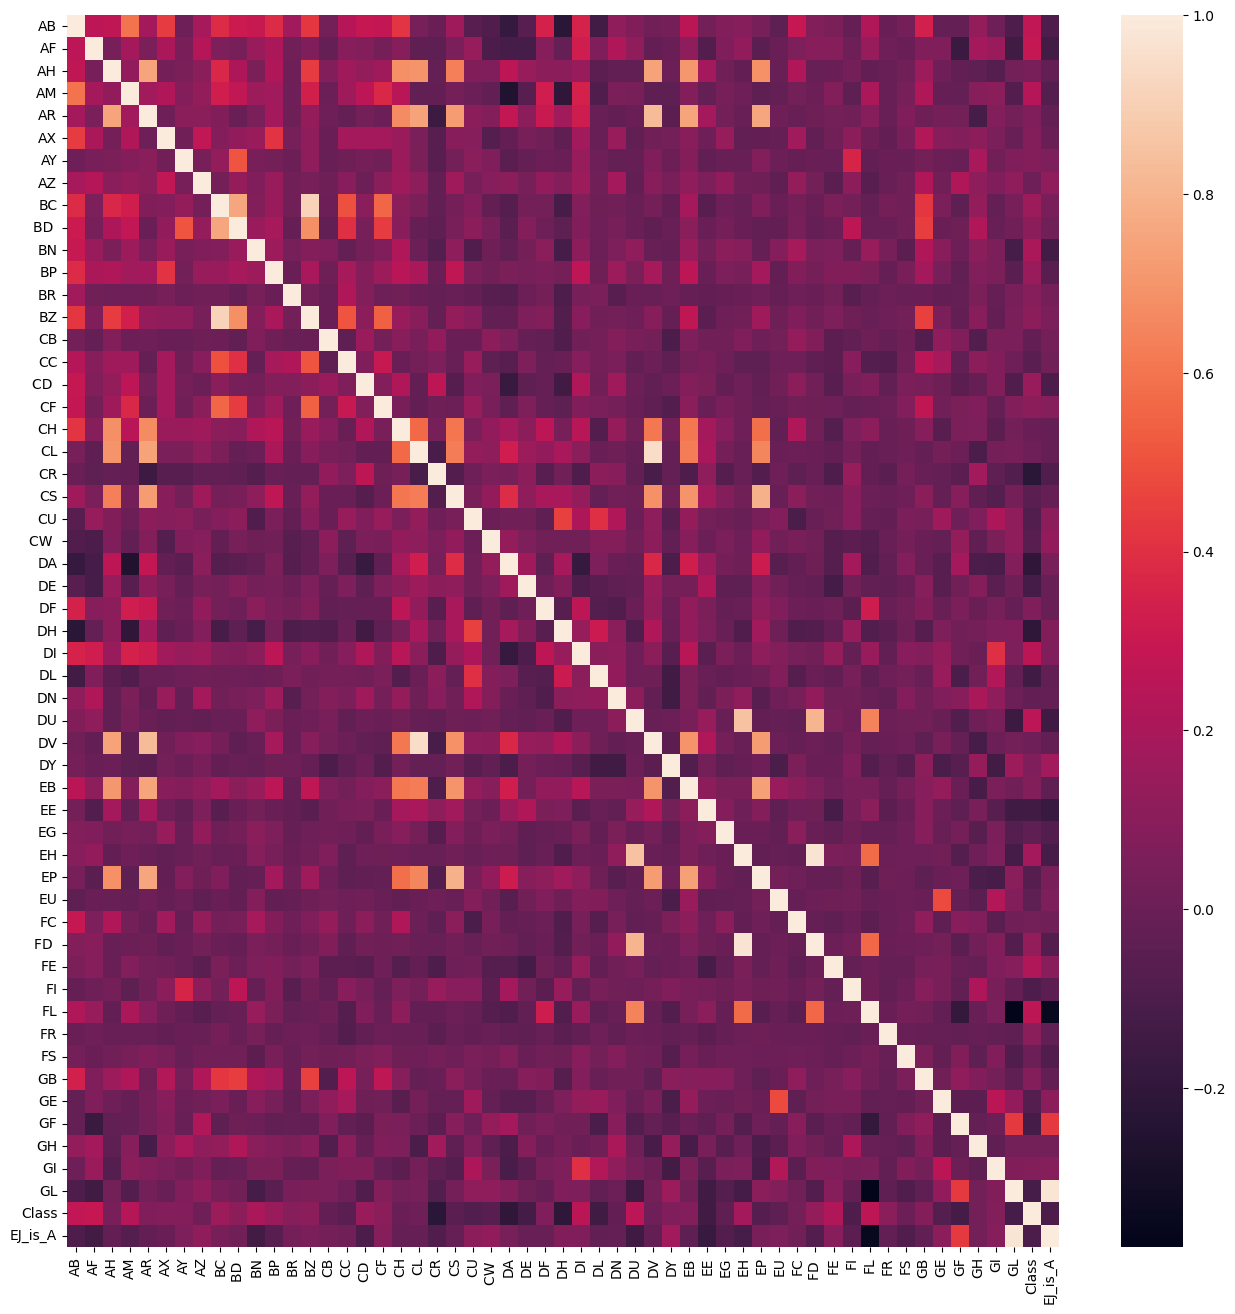

In [ ]:
#Now let's make a correlation heatmap to see how different values correlate with each other
plt.figure(figsize=(16,16))
sns.heatmap(scaled_df.corr())

In [ ]:
#For a more numeric depicition, let's write out the correlation values of every column to the class label
corr_df = scaled_df.corr()
print(abs(corr_df["Class"]).sort_values(ascending=False))

Class      1.000000
AF         0.293764
AB         0.273508
FL         0.265653
DU         0.262472
DI         0.255345
AM         0.237170
CR         0.226108
FE         0.218447
DH         0.207504
DA         0.201882
BN         0.200813
EH         0.180782
BC         0.156425
CD         0.147855
BP         0.144691
DL         0.143824
EE         0.140536
FD         0.131809
GF         0.130162
DE         0.126294
GL         0.123581
BZ         0.111820
BD         0.110657
CF         0.102366
EJ_is_A    0.101312
FR         0.100881
FI         0.097758
BR         0.088954
AY         0.083074
CU         0.082668
AX         0.082647
GB         0.081314
EB         0.078504
GI         0.077587
GE         0.074820
EP         0.068172
DY         0.066349
AR         0.065550
DF         0.064354
CW         0.059416
CC         0.053967
CS         0.049642
AH         0.042090
EU         0.040800
EG         0.034388
FC         0.030451
GH         0.027651
DN         0.027360
CB         0.025777


In [ ]:
#Looks like about half the values have a correlation coefficient of less than .1
#If we want to drop columns to save time on calculating, we could pick those
#For now let's try PCA analysis to see how much variance we can also explain
n = 6

x = target_df.drop(["Class"], axis=1)

y = target_df["Class"]

pca = PCA(n_components=n)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents)
print(np.array([pca.explained_variance_ratio_[:i].sum() for i in range(1, n+1)]).round(2))

#From playing around with the n components values, we can already explain 100% of variance with 6 n components
#Therefore we really don't need any more to really explain how this model is working


[0.64 0.86 0.96 0.98 0.99 1.  ]


In [ ]:
#Since we don't need a scalar to do random forest analysis, let's just put in our basic x and y values
#and model that way
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42, stratify=y)
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
predicted_results = rf.predict(X_test)
print(str("Our random forest accuracy score is : ") + str(round(accuracy_score(y_test, predicted_results)*100,2)) + "%")

RandomForestClassifier()

In [ ]:
#Our random forest gives out a ~89.13% accuracy without getting into nitty gritty calibrations
#Now let's try a few other methods to compare accuracy
#Next up is logistic regression. We'll grab our scalar data and see how we do
X_train, X_test, y_train, y_test = train_test_split(principalComponents, y, test_size=0.3, random_state=42, stratify=y)
clf = LogisticRegression(max_iter=10009, random_state=0).fit(principalComponents, y)
clf.predict(X_test)
clf.predict_proba(X_test)

print(str("Our logistic regression accuracy score is : ") + str(round(clf.score(X_test, y_test)*100,2)) + "%")
# Looks like we're getting an accuracy score around 85%

Our logistic regression accuracy score is : 85.33%


In [ ]:
#Looks like logistic regression returns similiar accuracy, but a bit lower.
#How about naives bayes?

X_train, X_test, y_train, y_test = train_test_split(principalComponents, y, test_size=0.3, random_state=42)
gnb = GaussianNB()
y_pred = gnb.fit(X_train, y_train).predict(X_test)
print(str("Our naives bayes accuracy score is : ") + str(round(accuracy_score(y_test, predicted_results)*100,2)) + "%")
# Looks like we're getting an accuracy score around 74%

Our naives bayes accuracy score is : 74.46%


Overall it seems out of the 3 different classifier models we tried here
random forest performed the best. We'll need to scale this out more
to see how this data does against the best models, and potentially
test it against kaggle's actual testing data, which we were not able
to access yet.
Hopefully these code snippets helped provide some insight into how I would
approach this problems and start solving a classification question